In [21]:
from csv import DictReader
data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Promil alkohola v krvi glede na spol voznika (pričakujemo, da bo moških več kot žensk).

In [22]:
slovar_m = dict()
slovar_z = dict()
slovar_m['manj'] = 0
slovar_z['manj'] = 0
slovar_m['vec'] = 0
slovar_z['vec'] = 0
for row in data:
    if row['Povzrocitelj'] == 'POVZROCITELJ':
        if row['Spol'] == 'MOSKI':
            if row['VrednostAlkotesta'].strip(',') < '50' and row['VrednostAlkotesta'].strip(',') != 0:
                slovar_m['manj'] += 1
            elif row['VrednostAlkotesta'].strip(',') >= '50':
                slovar_m['vec'] += 1
        else:
            if row['VrednostAlkotesta'].strip(',') < '50' and row['VrednostAlkotesta'].strip(',') != 0:
                slovar_z['manj'] += 1
            elif row['VrednostAlkotesta'].strip(',') >= '50':
                slovar_z['vec'] += 1
                
vsi = slovar_m['manj'] + slovar_m['vec'] + slovar_z['manj'] + slovar_z['vec']
moški_procent = (slovar_m['manj'] + slovar_m['vec']) / vsi
print("Odstotek vseh nesreč, kjer ima alkohol v krvi moški:", round(moški_procent * 100, 1))

Odstotek vseh nesreč, kjer ima alkohol v krvi moški: 72.6


In [23]:
vec_vsi = slovar_m['vec'] + slovar_z['vec']
manj_vsi = slovar_m['manj'] + slovar_z['manj']
slovar_m['manj'] = slovar_m['manj'] / manj_vsi
slovar_z['manj'] = slovar_z['manj'] / manj_vsi
slovar_m['vec'] = slovar_m['vec'] / vec_vsi
slovar_z['vec'] = slovar_z['vec'] / vec_vsi

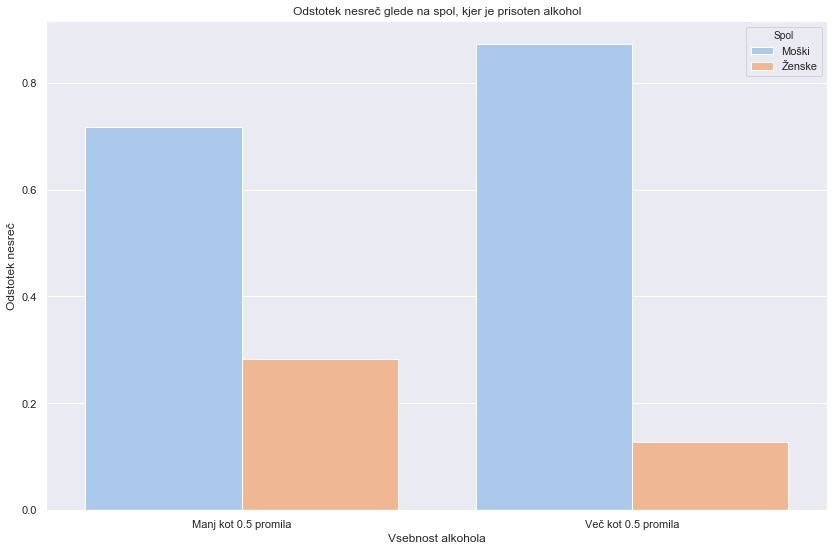

In [25]:
moski = pd.DataFrame({'Vsebnost alkohola':['Manj kot 0.5 promila', 'Več kot 0.5 promila'],'Odstotek nesreč':[i for i in slovar_m.values()]})
zenske = pd.DataFrame({'Vsebnost alkohola':['Manj kot 0.5 promila', 'Več kot 0.5 promila'],'Odstotek nesreč':[i for i in slovar_z.values()]})
moski['Spol'] = 'Moški'
zenske['Spol'] = 'Ženske'
res = pd.concat([moski,zenske])
sns.barplot(x = 'Vsebnost alkohola', y = 'Odstotek nesreč', data = res, hue = 'Spol', palette='pastel').set_title('Odstotek nesreč glede na spol, kjer je prisoten alkohol')
sns.set(rc={'figure.figsize':(14,9)})
plt.show()

Iz grafa lahko razberemo, da so za nesreče, kjer je prisoten alkohol, v večini krivi moški. V primeru, kjer ima povzročitelj v krvi več kot 0.5 promila alkohola, je moških več kot 80%. Naša začetna trditev je tako potrjena.

Odstotek nesreč glede na narodnost povzročitelja. Pričakujemo lahko, da bo večina ljudi Slovencev.

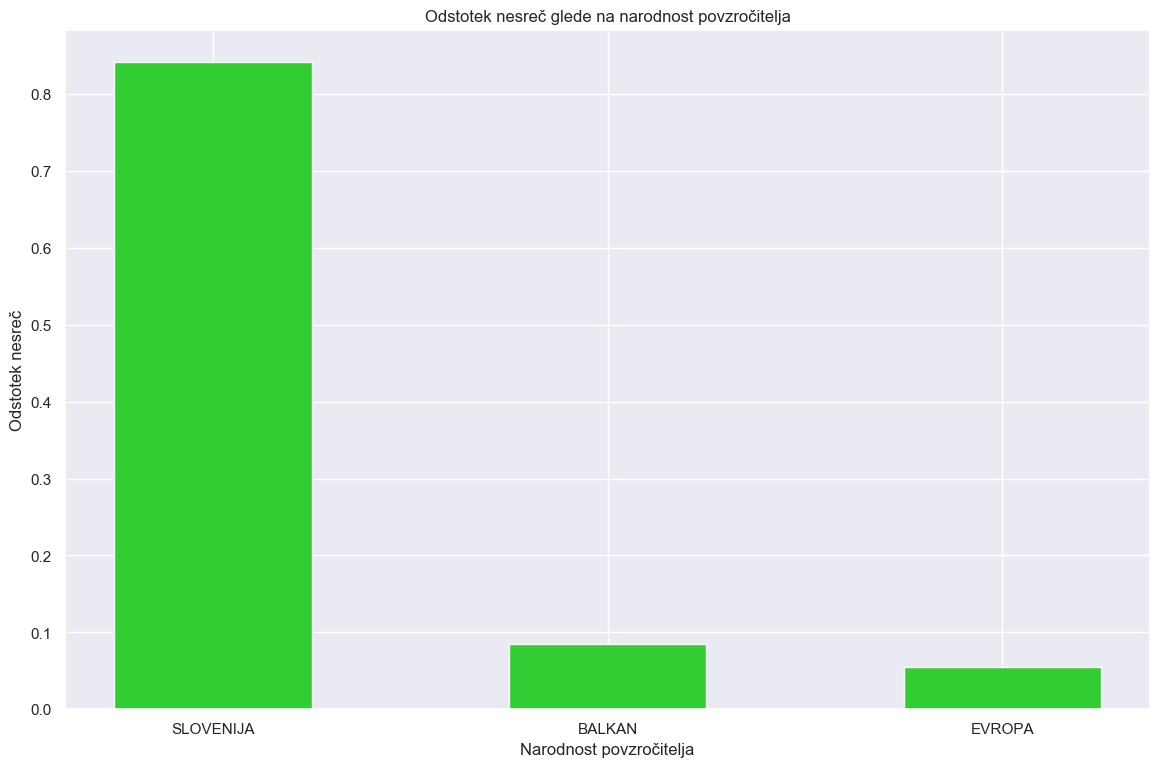

In [26]:
zacetni = dict()
vsi = 0
evropa = ['MADZARSKA', 'NEMCIJA', 'UKRAJINA','ITALIJA','BOLGARIJA','AVSTRIJA','FRANCIJA','SLOVASKA','LATVIJA',
          'VELIKA BRITANIJA','POLJSKA','GRCIJA','CESKA REPUBLIKA','NIZOZEMSKA','SVICA','SPANIJA',
          'SVEDSKA','PORTUGALSKA','BELGIJA','LITVA','IRSKA','LUKSEMBURG','ESTONIJA', 'MOLDAVIJA']
balkan = ['SRBIJA','SEVERNA MAKEDONIJA','HRVASKA', 'BOSNA IN HERCEGOVINA','TURCIJA','CRNA GORA','KOSOVO','ALBANIJA']
for row in data:
    if row['Povzrocitelj'] == 'POVZROCITELJ':
        vsi = vsi + 1
        if row['Drzavljanstvo'] not in zacetni.keys():
            zacetni[row['Drzavljanstvo']] = 1
        else:
            zacetni[row['Drzavljanstvo']] += 1
narodnosti = dict()
narodnosti['SLOVENIJA'] = 0
narodnosti['BALKAN'] = 0
narodnosti['EVROPA'] = 0
for key, value in zacetni.items():
    if key in evropa:
        narodnosti['EVROPA'] += value
    elif key in balkan:
        narodnosti['BALKAN'] += value
    elif key == 'SLOVENIJA':
        narodnosti['SLOVENIJA'] = value
for key, value in narodnosti.items():
    narodnosti[key] = value / vsi
plt.figure(dpi=100)
plt.bar(narodnosti.keys(), narodnosti.values(), color='limegreen', width = 0.5);
plt.title("Odstotek nesreč glede na narodnost povzročitelja")
plt.ylabel("Odstotek nesreč")
plt.xlabel("Narodnost povzročitelja");

Zgornji graf potrdi našo domnevo. Povzročiteljev iz Slovenije je več kot 80%.

Ali uporaba/neuporaba varnostnega pasu vpliva na poškodbe udeležencev v prometnih nesrečah.

In [27]:
DA = dict()
NE = dict()
DA['brez'] = 0
DA['lazja'] = 0
DA['huda'] = 0
DA['smrt'] = 0
NE['brez'] = 0
NE['lazja'] = 0
NE['huda'] = 0
NE['smrt'] = 0
številoPripetih = 0
številoNePripetih = 0
for row in data:
    if row['UporabaVarnostnegaPasu'] == 'DA':
        številoPripetih = 1 + številoPripetih
        if row['PoskodbaUdelezenca'] == 'BREZ POSKODBE':
            DA['brez'] += 1
        if row['PoskodbaUdelezenca'] == 'LAZJA TELESNA POSKODBA':
            DA['lazja'] += 1
        if row['PoskodbaUdelezenca'] == 'HUDA TELESNA POSKODBA':
            DA['huda'] += 1
        if row['PoskodbaUdelezenca'] == 'SMRT':
            DA['smrt'] += 1
    elif row['UporabaVarnostnegaPasu'] == 'NE':
        številoNePripetih = 1 + številoNePripetih
        if row['PoskodbaUdelezenca'] == 'BREZ POSKODBE':
            NE['brez'] += 1
        if row['PoskodbaUdelezenca'] == 'LAZJA TELESNA POSKODBA':
            NE['lazja'] += 1
        if row['PoskodbaUdelezenca'] == 'HUDA TELESNA POSKODBA':
            NE['huda'] += 1
        if row['PoskodbaUdelezenca'] == 'SMRT':
            NE['smrt'] += 1
print("Število udeležencev prometnih nesreč, ki so bili pripeti z varnostnim pasom:", številoPripetih)
print("Število udeležencev prometnih nesreč, ki so niso bili pripeti z varnostnim pasom:", številoNePripetih)
print("Odstotek ljudi, ki so bili pripeti:", round(številoPripetih/(številoPripetih + številoNePripetih) * 100,1))

Število udeležencev prometnih nesreč, ki so bili pripeti z varnostnim pasom: 26897
Število udeležencev prometnih nesreč, ki so niso bili pripeti z varnostnim pasom: 3006
Odstotek ljudi, ki so bili pripeti: 89.9


Vidimo, da je bilo 90% ljudi, udeleženih v prometnih nesrečah, pripetih z varnostnim pasom.

In [29]:
skupajDa = DA['brez'] + DA['lazja'] + DA['huda'] + DA['smrt']
skupajNe = NE['brez'] + NE['lazja'] + NE['huda'] + NE['smrt']
DA['brez'] = DA['brez'] / skupajDa
DA['lazja'] = DA['lazja'] / skupajDa
DA['huda'] = DA['huda'] / skupajDa
DA['smrt'] = DA['smrt'] / skupajDa
NE['brez'] = NE['brez'] / skupajNe
NE['lazja'] = NE['lazja'] / skupajNe
NE['huda'] = NE['huda'] / skupajNe
NE['smrt'] = NE['smrt'] / skupajNe

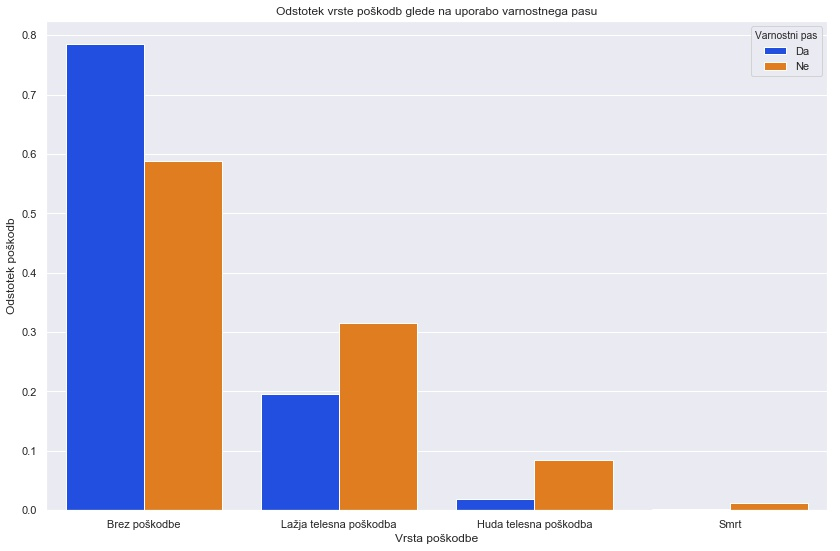

In [30]:
da = pd.DataFrame({'Vrsta poškodbe':['Brez poškodbe', 'Lažja telesna poškodba', 'Huda telesna poškodba', 'Smrt'],'Odstotek poškodb':[i for i in DA.values()]})
ne = pd.DataFrame({'Vrsta poškodbe':['Brez poškodbe', 'Lažja telesna poškodba', 'Huda telesna poškodba', 'Smrt'],'Odstotek poškodb':[i for i in NE.values()]})
da['Varnostni pas'] = 'Da'
ne['Varnostni pas'] = 'Ne'
res = pd.concat([da,ne])
sns.barplot(x = 'Vrsta poškodbe', y = 'Odstotek poškodb', data = res, hue = 'Varnostni pas', palette='bright').set_title('Odstotek vrste poškodb glede na uporabo varnostnega pasu')
sns.set(rc={'figure.figsize':(14,9)})
plt.show()

In [31]:
print("Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom:", round(DA['smrt']*100,2))
print("Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom:", round(NE['smrt']*100,2))
print("Odstotek nesreč z hudimi telesnimi poškodbami, kjer udeleženec ni bil pripet z varnostnim pasom:", round(NE['huda']*100,2))

Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom: 0.21
Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom: 1.23
Odstotek nesreč z hudimi telesnimi poškodbami, kjer udeleženec ni bil pripet z varnostnim pasom: 8.51


Prej smo ugotovili, da je bilo 90% udeležencev prometnih nesreč pripetih z varnostnim pasom. Od ostalih **10%** ljudi, ki niso bili pripeti z varnostnim pasom jih je **1.23%** umrlo v prometni nesreči, kar je **1%** več, kot pa pri udeležencih, kateri so bili pripeti. Hude telesne poškodbe jih je imelo okrog **9%**.

In [32]:
print("Število mrtvih ljudi, ki niso bili pripeti z varnostnim pasom:", round((številoNePripetih * (NE['smrt']*100)) / 100))

Število mrtvih ljudi, ki niso bili pripeti z varnostnim pasom: 37
